In [2]:
import pandas as pd
from pathlib import Path
from glob import glob
import numpy as np
from datetime import datetime,timedelta
from tqdm.notebook import tqdm

Import and sort all caravela apogee_SL510 eurec4a files, creating a dataframe from this:

In [2]:
files_list = glob(r'E:\Eurec4a_master\Caravela\apogee_SP_110\*\*'+ '/*SP_110*')  
files_list.sort()

li = []

for filename in tqdm(files_list):
    df = pd.read_csv(filename, header=0, sep=',',index_col=False)
    li.append(df)

sp = pd.concat(li, axis=0)

In [3]:
sp

,PC Timestamp[UTC],PC Time Zone,SP-110-SS[W m-2]
0,2020/01/15 12:06:15.358,00:00:00,207.830
1,2020/01/15 12:06:16.367,00:00:00,195.545
2,2020/01/15 12:06:17.372,00:00:00,190.130
3,2020/01/15 12:06:18.382,00:00:00,185.170
4,2020/01/15 12:06:19.390,00:00:00,172.355
...,...,...,...
3573,2020/02/24 18:59:55.333,00:00:00,2.365
3574,2020/02/24 18:59:56.341,00:00:00,2.365
3575,2020/02/24 18:59:57.350,00:00:00,2.365
3576,2020/02/24 18:59:58.358,00:00:00,2.365


Parse the timestamp to a datetime format

In [4]:
dt = []
for i in tqdm(sp['PC Timestamp[UTC]']):
    dt.append(datetime.fromisoformat([i]))
sp['dt [UTC]'] = dt

In [5]:
sp = sp[(sp['dt [UTC]'] >= '2020-01-22 00:00:00.000')] #select data from Caravela's launch onwards
sp

,PC Timestamp[UTC],PC Time Zone,SP-110-SS[W m-2],dt [UTC]
0,2020/01/22 17:20:06.798,00:00:00,356.075,2020-01-22 17:20:06.798
1,2020/01/22 17:20:07.795,00:00:00,359.050,2020-01-22 17:20:07.795
2,2020/01/22 17:20:08.801,00:00:00,361.645,2020-01-22 17:20:08.801
3,2020/01/22 17:20:09.809,00:00:00,362.330,2020-01-22 17:20:09.809
4,2020/01/22 17:20:10.816,00:00:00,361.950,2020-01-22 17:20:10.816
...,...,...,...,...
3573,2020/02/24 18:59:55.333,00:00:00,2.365,2020-02-24 18:59:55.333
3574,2020/02/24 18:59:56.341,00:00:00,2.365,2020-02-24 18:59:56.341
3575,2020/02/24 18:59:57.350,00:00:00,2.365,2020-02-24 18:59:57.350
3576,2020/02/24 18:59:58.358,00:00:00,2.365,2020-02-24 18:59:58.358


Tidy this up to drop the columns we dont need

In [6]:
sp = sp.reset_index()
sp = sp.drop(['index','PC Time Zone','PC Timestamp[UTC]' ],axis=1)

check for any gaps in timeseries larger than 2 seconds

In [7]:
time_diff = sp['dt [UTC]'].values[1:] - sp['dt [UTC]'].values[:-1]
for i in np.arange(1, len(time_diff)):
    if np.timedelta64(3599, 's') >= time_diff[i] > np.timedelta64(2, 's'):
        print('gap starts at', sp['dt [UTC]'][i], 'and lasts for', 
              np.timedelta64(time_diff[i],'s'))
    if time_diff[i] > np.timedelta64(3599, 's'):
        print('gap starts at', sp['dt [UTC]'][i], 'and lasts for', 
              np.timedelta64(time_diff[i],'s'), ' - approximately', np.timedelta64(time_diff[i],'h'))

gap starts at 2020-01-22 20:36:23.464000 and lasts for 7352 seconds  - approximately 2 hours
gap starts at 2020-01-22 22:46:44.264000 and lasts for 13222 seconds  - approximately 3 hours
gap starts at 2020-01-27 13:02:10.301000 and lasts for 89486 seconds  - approximately 24 hours
gap starts at 2020-01-29 17:47:36.976000 and lasts for 20 seconds
gap starts at 2020-01-31 18:08:06.895000 and lasts for 14 seconds
gap starts at 2020-02-01 15:29:12.123000 and lasts for 2 seconds
gap starts at 2020-02-04 10:53:07.094000 and lasts for 15 seconds
gap starts at 2020-02-07 08:06:33.486000 and lasts for 2 seconds
gap starts at 2020-02-09 21:46:59.899000 and lasts for 3 seconds
gap starts at 2020-02-13 11:54:22.136000 and lasts for 2 seconds
gap starts at 2020-02-14 05:56:17.835000 and lasts for 2 seconds
gap starts at 2020-02-14 11:01:33.949000 and lasts for 2 seconds
gap starts at 2020-02-21 20:45:34.363000 and lasts for 2 seconds
gap starts at 2020-02-24 14:20:10.688000 and lasts for 11986 seco

Convert to iso time as this is a universally accepted format

In [9]:
a = []
for i in tqdm(range(0,len(sp['dt [UTC]']))):
    a.append(sp['dt [UTC]'][i].isoformat())
sp['datetime [UTC]'] = a

In [10]:
sp = sp.drop(['dt [UTC]'], axis = 1)

In [11]:
sp.to_csv('CARAVELA_SP110.csv',index = None)

In [3]:
baa = pd.read_csv('CARAVELA_SP110.csv')# import file to test it

In [4]:
z = []
for i in tqdm(baa['datetime [UTC]']):
    z.append(datetime.fromisoformat(i))
baa['dt'] = z

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Date')

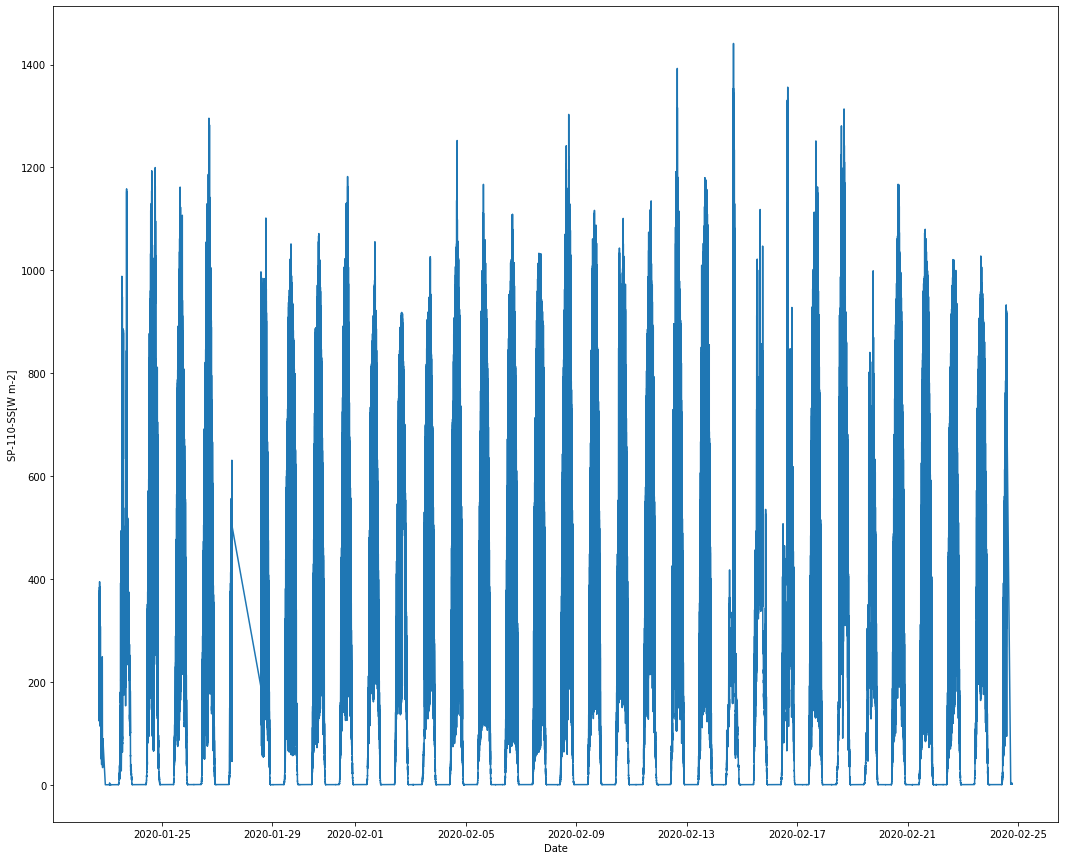

In [8]:
fig,ax = plt.subplots(1,1, figsize=(18, 15))
ax.plot(baa['dt'], baa['SP-110-SS[W m-2]'])
ax.set_ylabel('SP-110-SS[W m-2]')
ax.set_xlabel('Date')